In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('assets/IMG_4211.jpeg')

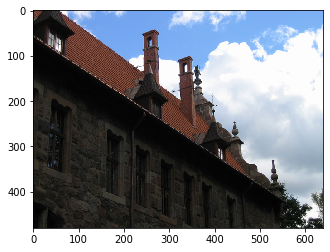

In [2]:
plt.imshow(img)

In [3]:
# convert image into a numpy array
img = np.asarray(img)

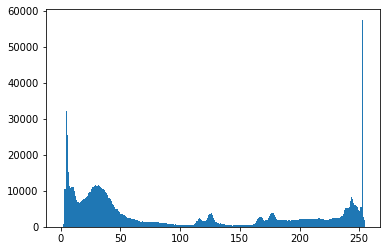

In [4]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
_ = plt.hist(flat, bins=256)

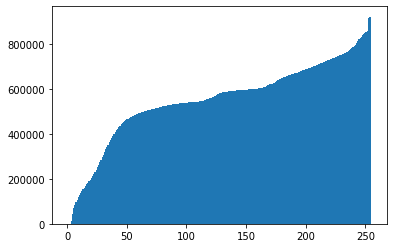

In [5]:
cs, _, _ = plt.hist(flat, bins=256, cumulative=True)

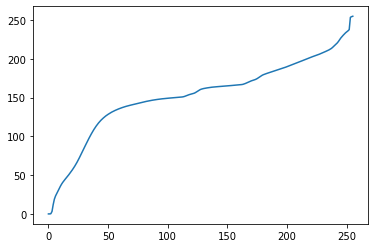

In [6]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

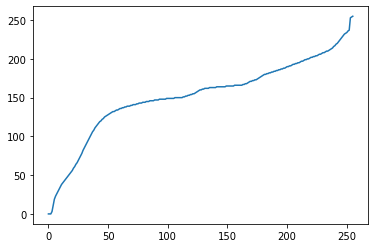

In [7]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

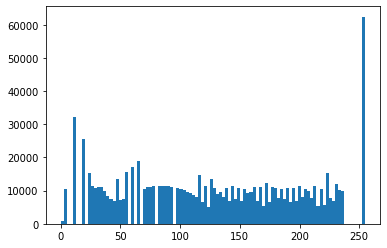

In [8]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
_ = plt.hist(img_new, bins=100)

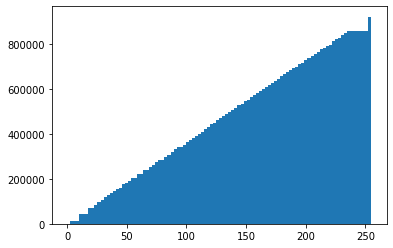

In [9]:
# And cumulative histogram
_ = plt.hist(img_new, bins=100, cumulative=True)

In [10]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

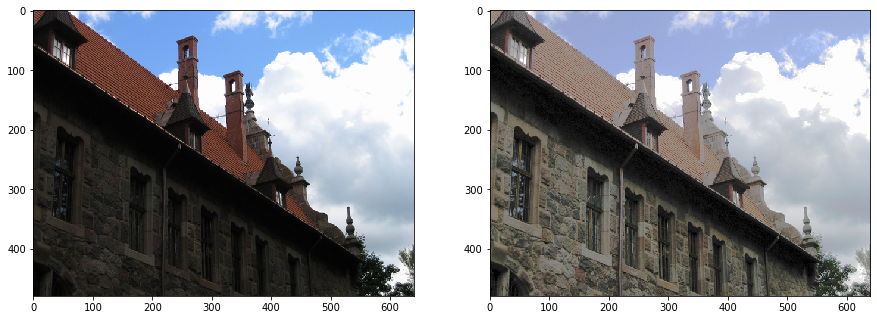

In [11]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img)

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new)

plt.show(block=True)